In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("BostonHousing.csv")

In [4]:
df.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [23]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn. preprocessing import StandardScaler
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm.notebook import tqdm


In [15]:
boston = tf.keras.datasets.boston_housing

In [16]:
boston_data = boston.load_data()

57026/57026 [==============================] - 0s 4us/step


In [18]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(test_split=0.2, seed=42)

In [19]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [24]:
scaler = StandardScaler()

In [25]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.reshape(-1, 1))


In [30]:
model = tf.keras.models.Sequential ([
tf.keras.layers.Input(shape=(13), name='input-layer'),
tf.keras.layers.Dense(100, name='hidden-layer-2'),
tf.keras.layers.BatchNormalization(name='hidden-layer-3'),
tf.keras.layers.Dense(50, name='hidden-layer-4'),
tf.keras.layers.Dense(1, name='output-layer')
])

In [31]:
model. summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden-layer-2 (Dense)      (None, 100)               1400      
                                                                 
 hidden-layer-3 (BatchNormal  (None, 100)              400       
 ization)                                                        
                                                                 
 hidden-layer-4 (Dense)      (None, 50)                5050      
                                                                 
 output-layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 6,901
Trainable params: 6,701
Non-trainable params: 200
_________________________________________________________________


In [32]:
model.compile(optimizer='adam', loss='mse',metrics=['mae'])

In [33]:
history = model.fit(x_train, y_train, batch_size=32, epochs=20,validation_data=(x_test, y_test))

Epoch 1/20
13/13 [==============================] - 3s 13ms/step - loss: 570.5671 - mae: 22.3700 - val_loss: 2448.0544 - val_mae: 46.4905
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 548.3130 - mae: 22.0393 - val_loss: 820.8315 - val_mae: 26.9014
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 524.3058 - mae: 21.6363 - val_loss: 784.9453 - val_mae: 26.6444
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 496.9857 - mae: 21.0380 - val_loss: 794.4642 - val_mae: 27.1049
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 452.9112 - mae: 20.1148 - val_loss: 650.0784 - val_mae: 24.5660
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 386.2831 - mae: 18.5949 - val_loss: 495.6626 - val_mae: 21.3632
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 295.9033 - mae: 16.1361 - val_loss: 292.2125 - val_mae: 16.1574
Epoch 8/20
13/13 [============================

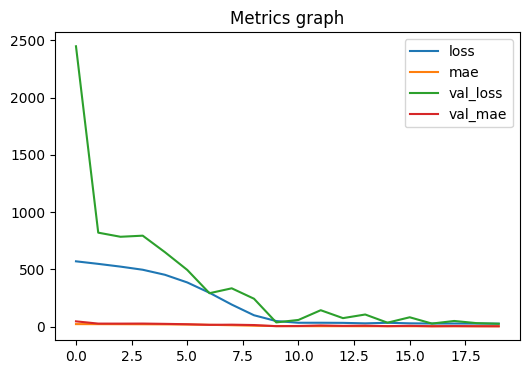

In [35]:
pd.DataFrame(history.history).plot(figsize=(6,4))
plt.title("Metrics graph")
plt.show()

In [36]:
y_pred = model.predict(x_test)

4/4 [==============================] - 1s 2ms/step


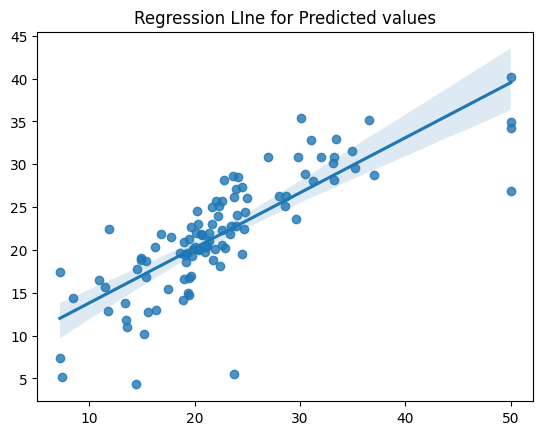

In [37]:
sns.regplot(x=y_test, y=y_pred)
plt.title("Regression LIne for Predicted values")
plt.show()

In [45]:
print(f"MAE is {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"MSE IS {metrics.mean_squared_error(y_test,y_pred)}")
print(f"R2 score is {metrics.r2_score(y_test,y_pred)}")

MAE is 3.454099412992889
MSE IS 25.921184986148536
R2 score is 0.6359486992333271
